# Histogramas

### ¿Qué haremos?
Uso de histogramas mediante matplotlib para ver distribución de datos continuos e identificar valores atípicos.

### Paquetes requeridos

matplotlib, statsmodels, numpy




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [30]:
# Datos de terreno

terreno= pd.read_csv("data/landtemps2019avgs.csv")
covid= pd.read_csv("data/covidtotals.csv", parse_dates=['lastdate'])
covid.set_index('iso_code', inplace=True)

In [6]:
terreno.head()

,locationid,station,countryid,country,latabs,elevation,avgtemp
0,AE000041196,SHARJAH_INTER_AIRP,AE,United Arab Emirates,25.333,34.0,28.251667
1,AEM00041194,DUBAI_INTL,AE,United Arab Emirates,25.255,10.4,29.585833
2,AEM00041217,ABU_DHABI_INTL,AE,United Arab Emirates,24.433,26.8,29.400000
3,AEM00041218,AL_AIN_INTL,AE,United Arab Emirates,24.262,264.9,29.061667
4,AFM00040938,HERAT,AF,Afghanistan,34.210,977.2,18.257500


In [9]:
terreno.shape

(12095, 7)

In [7]:
columnas_interes=['station', 'country', 'latabs','elevation', 'avgtemp']

In [8]:
terreno[columnas_interes].sample(10, random_state=1)

,station,country,latabs,elevation,avgtemp
10526,NEW_FORK_LAKE,United States,43.1167,2542.0,1.864167
1416,NEIR_AGDM,Canada,51.3667,1145.0,2.185000
2230,CURICO,Chile,34.9670,225.0,15.504167
6002,LIFTON_PUMPING_STN,United States,42.1231,1809.0,4.385833
2106,HUAILAI,China,40.4170,538.0,11.020833
2090,MUDANJIANG,China,44.5670,242.0,5.816667
7781,CHEYENNE_6SW_MESONET,United States,35.5461,694.0,14.875833
10502,SHARKSTOOTH,United States,37.5000,3267.5,4.105833
11049,CHALLIS_AP,United States,44.5228,1534.1,6.510000
2820,METHONI,Greece,36.8331,52.0,18.200000


In [10]:
terreno.describe()

,latabs,elevation,avgtemp
count,12095.000000,12095.000000,12095.000000
mean,40.466791,589.330211,11.193542
std,12.611377,761.973468,8.563443
min,0.017000,-350.000000,-60.821000
25%,34.510300,78.000000,5.417917
50%,40.670300,271.300000,10.450000
75%,46.750550,817.500000,16.919583
max,90.000000,9999.000000,33.930000


In [11]:
terreno.avgtemp.kurtosis()

2.1698313707061074

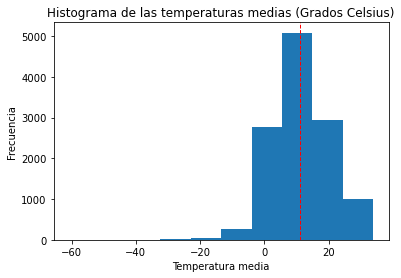

In [17]:
plt.hist(terreno.avgtemp)
plt.axvline(terreno.avgtemp.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Histograma de las temperaturas medias (Grados Celsius)")
plt.xlabel("Temperatura media")
plt.ylabel("Frecuencia")
plt.show()

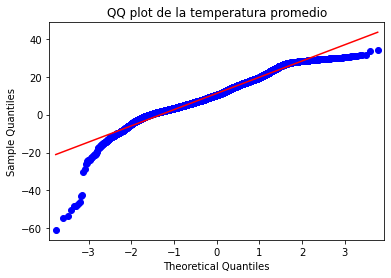

In [28]:
sm.qqplot(terreno[['avgtemp']].sort_values(['avgtemp']), line='s')
plt.title("QQ plot de la temperatura promedio")
plt.show()

In [31]:
covid.total_cases_pm.kurtosis()

26.137524276840452

In [32]:
covid.head()

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds,region
iso_code,,,,,,,,,,,,
AFG,2020-07-12,Afghanistan,34451.0,1010.0,884.985,25.945,38928341.0,54.422,18.6,1803.987,0.50,South Asia
ALB,2020-07-12,Albania,3371.0,89.0,1171.381,30.926,2877800.0,104.871,38.0,11803.431,2.89,Eastern Europe
DZA,2020-07-12,Algeria,18712.0,1004.0,426.717,22.896,43851043.0,17.348,29.1,13913.839,1.90,North Africa
AND,2020-07-12,Andorra,855.0,52.0,11065.812,673.008,77265.0,163.755,NaN,NaN,NaN,Western Europe
AGO,2020-07-12,Angola,483.0,25.0,14.696,0.761,32866268.0,23.890,16.8,5819.495,NaN,Central Africa


In [33]:
covid.region.value_counts()

Western Europe     32
Eastern Europe     22
Caribbean          22
West Africa        17
East Asia          16
West Asia          16
East Africa        13
South America      13
Central Africa     11
Southern Africa     9
South Asia          9
Oceania / Aus       8
Central America     7
Central Asia        6
North Africa        5
North America       3
Name: region, dtype: int64

In [45]:
regiones=['Oceania / Aus', 'East Asia','Southern Africa', 'Western Europe']


(array([[ 8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [23.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [31.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [39., 12.,  8.,  3.,  0.,  1.,  0.,  1.,  0.,  1.]]),
 array([1.22900000e+00, 2.10494250e+03, 4.20865600e+03, 6.31236950e+03,
        8.41608300e+03, 1.05197965e+04, 1.26235100e+04, 1.47272235e+04,
        1.68309370e+04, 1.89346505e+04, 2.10383640e+04]),
 <a list of 4 BarContainer objects>)

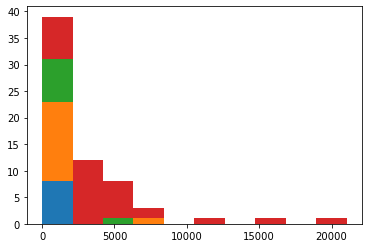

In [46]:
def casos(region):
    return covid.loc[covid.region==region, 'total_cases_pm']

colores=['blue','green', 'red', 'mediumvioletred']

plt.hist([casos(region) for region in regiones ], label=regiones, stacked=True)

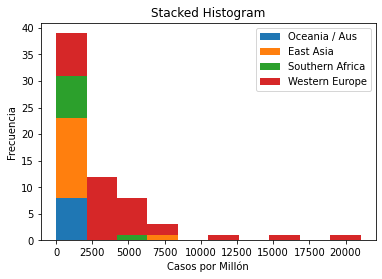

In [47]:
def casos(region):
    return covid.loc[covid.region==region, 'total_cases_pm']

colores=['blue','green', 'red', 'mediumvioletred']

plt.hist([casos(region) for region in regiones ], label=regiones, stacked=True)
plt.title("Stacked Histogram")
plt.xlabel("Casos por Millón")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0,22500, step=2500))
plt.legend()
plt.show()



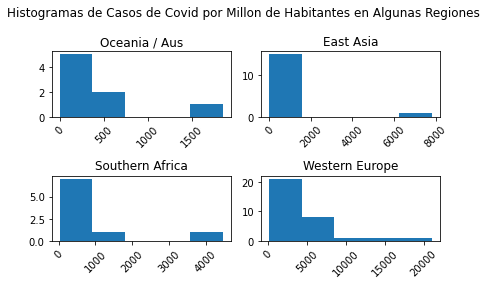

In [50]:
fig,ax= plt.subplots(2,2)
fig.suptitle("Histogramas de Casos de Covid por Millon de Habitantes en Algunas Regiones")
ax= ax.ravel()

for i,axes in enumerate(ax):
    axes.hist(covid.loc[covid.region==regiones[i]].total_cases_pm, bins=5)
    axes.set_title(regiones[i], fontsize=12)
    for tick in axes.get_xticklabels():
        tick.set_rotation(45)
plt.tight_layout()
#plt.subplots_adjust(top=0.9)
plt.show()

<AxesSubplot:>

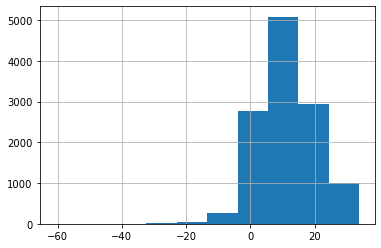

In [18]:
terreno.avgtemp.hist()

AttributeError: 'Rectangle' object has no property 'normed'

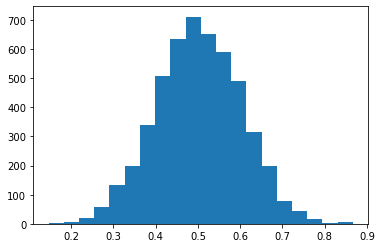

In [54]:
mu, sigma = 0.5 , 0.1
datos=np.random.normal(mu,sigma, 5000)
plt.hist(datos,20, normed=True)


In [ ]:
fig, ax = plt.subplot()
(pd.cut(terreno['avgtemp'],\
        bins=np.arange(-70,34,10)).value_counts().sort_index().plot.bar(ax=ax)\
)
